# Quasi-Random Sequence Generator Comparison

QMCPy's low-discrepancy-sequence generators are built upon generators developed by
1. D. Nuyens, *The Magic Point Shop of QMC point generators and generating vectors.*<br>
MATLAB and Python software, 2018. Available from https://people.cs.kuleuven.be/~dirk.nuyens/

In [1]:
from qmcpy import *

import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

from numpy import *

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

## *Magic Point Shop* Generators vs QMCPy Generators
In an effort to improve the generators speed, QMCPy developers modified the algorithms developed in *The Magic Point Shop*.<br>
The following blocks visualize the speed improvement of QMCPy when generating <b> 1 dimensional</b> unshifted/unscrambled sequences.<br>
Data for the following plots can be generated by running
~~~
python workouts/wo_lds_sequences/mps_original_vs_qmcpy.py
~~~

In [2]:
df_mps = pd.read_csv('../outputs/lds_sequences/magic_point_shop_times.csv')
df_mps.n_2power = df_mps.n_2power.astype(int)
df_mps

,n_2power,mps_lattice_time,qmcpy_lattice_time,mps_Sobol_time,qmcpy_Sobol_time
0,1,7.25e-05,9.97e-05,1.02e+00,1.55e-02
1,2,7.87e-05,1.10e-04,1.12e+00,1.60e-02
2,3,1.30e-04,1.39e-04,1.03e+00,1.54e-02
3,4,1.75e-04,1.48e-04,9.95e-01,1.47e-02
4,5,2.83e-04,1.60e-04,1.04e+00,1.49e-02
5,6,5.11e-04,1.69e-04,1.06e+00,1.62e-02
6,7,1.04e-03,1.91e-04,1.13e+00,1.68e-02
7,8,2.03e-03,2.52e-04,1.03e+00,1.64e-02
8,9,3.76e-03,2.26e-04,1.08e+00,1.73e-02
9,10,8.22e-03,3.03e-04,1.19e+00,1.90e-02


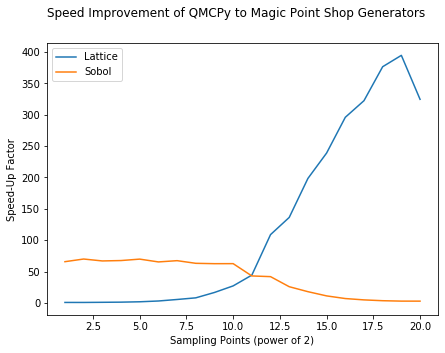

In [6]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
n_power2 = df_mps.n_2power
suf_lattice = df_mps.mps_lattice_time.values / df_mps.qmcpy_lattice_time.values
ax.plot(n_power2, suf_lattice, label='Lattice')
suf_Sobol = df_mps.mps_Sobol_time.values / df_mps.qmcpy_Sobol_time.values
ax.plot(n_power2, suf_Sobol, label='Sobol')
ax.legend(loc='upper left')
ax.set_xlabel('Sampling Points (power of 2)')
ax.set_ylabel('Speed-Up Factor')
fig.suptitle('Speed Improvement of QMCPy to Magic Point Shop Generators')
plt.savefig('../outputs/lds_sequences/mps_vs_qmcpy_generators.png', dpi=200)

## MATLAB vs Python Generator Speed
Compare the speed of low-discrepancy-sequence generators from MATLAB and Python.<br>
The following blocks visualize the speed improvement of MATLAB when generating <b> 1 dimensional</b> shifted/scrambled sequences.<br>
In the future, we hope to see similar generating times between the two langauges<br>
Python data for the following plots can be generated by running
~~~
python workouts/wo_lds_sequences/qmcpy_sequences.py
~~~
MATLAB data can be generated by running the file at `workouts/wo_lds_sequences/matlab_sequences.py`

<b>Notes</b>
- For Python both generators are part of the qmcpy package, located at `qmcpy/discrete_distribution/`
- For MATLAB, the Sobol generator is built in, while the lattice generator is part of the GAIL package:
    - Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou, GAIL: Guaranteed Automatic Integration Library (Version 2.3) [MATLAB Software], 2019. Available from http://gailgithub.github.io/GAIL_Dev/
    - lattice_gen from: https://github.com/GailGithub/GAIL_Dev/blob/master/Algorithms/%2Bgail/lattice_gen.m

In [4]:
df_matlab = pd.read_csv('../outputs/lds_sequences/matlab_sequence_times.csv', header=None)
df_matlab.columns = ['n_2power', 'matlab_Lattice_time', 'matlab_Sobol_time']
df_python = pd.read_csv('../outputs/lds_sequences/python_sequence_times.csv')
df_python.columns = ['n_2power', 'python_Lattice_time', 'python_Sobol_time']
df_languages = pd.concat([df_matlab[['n_2power','matlab_Lattice_time']],df_python['python_Lattice_time'],\
                    df_matlab['matlab_Sobol_time'],df_python['python_Sobol_time']], axis=1)
df_languages.head()

,n_2power,matlab_Lattice_time,python_Lattice_time,matlab_Sobol_time,python_Sobol_time
0,1,4.94e-04,2.65e-04,8.32e-04,5.91e-03
1,2,3.22e-04,3.13e-04,8.03e-04,5.56e-03
2,3,3.97e-04,2.41e-04,6.44e-04,5.24e-03
3,4,2.39e-04,2.68e-04,5.17e-04,5.97e-03
4,5,5.89e-04,2.57e-04,9.60e-04,4.95e-03


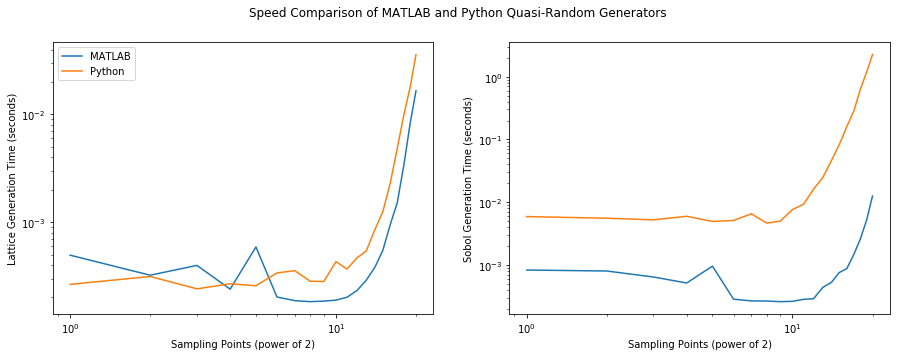

In [5]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
n_power2 = df_languages.n_2power
for i,lds_name in enumerate(['Lattice','Sobol']):
    ax[i].loglog(n_power2, df_languages['matlab_%s_time'%lds_name], label='MATLAB')
    ax[i].loglog(n_power2, df_languages['python_%s_time'%lds_name], label='Python')
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Sampling Points (power of 2)')
ax[0].set_ylabel('Lattice Generation Time (seconds)')
ax[1].set_xlabel('Sampling Points (power of 2)')
ax[1].set_ylabel('Sobol Generation Time (seconds)')
fig.suptitle('Speed Comparison of MATLAB and Python Quasi-Random Generators')
plt.savefig('../outputs/lds_sequences/matlab_vs_python_generators.png', dpi=200)